# Global Daily Energy Intakes

![](lily-banse--YHSwy6uqvk-unsplash.jpg)

*Photo by Lily Banse [Unsplash](unsplash.com)*

Hello! I hope you're doing alright.

The following is a small portion of my master's thesis titled "*An Evaluation of National Food Systems According to the Seven Metrics of Sustainable Nutrition Security.*". As mentioned in the title, the thesis aims at checking the performance of four income groups; *High-income, upper-middle-income, lower-middle-income, and low-income* countries on seven metrics of sustainable nutrition security. The seven metrics are *Food Nutrient Adequacy, Ecosystem Stability, Food Affordability and Availability, Socio-cultural Wellbeing, Resilience, Food Safety, and Waste and Loss Reduction.*


This particular extract looks at the first indicator in the first metric: *Percent of Energy from Non-Staple foods*. Other indicators in this metric include *Shannon Diversity, Modified Functional Attribute Diversity, The Nutrient Balance Score, and the Percentage of Populations with Adequate Nutrient Intakes.*


The original data was taken from FAO's food balance sheets (UN's Food and Agriculture Organization), and it consisted of daily intake values of 96 animal and food products, expressed in KCal (KiloCalories). It was then grouped into 13 food groups according to the [USDA food composition tables](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/methods-and-application-of-food-composition-laboratory/mafcl-site-pages/sr11-sr28/). Enjoy.

In [1]:
# The necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Previewing the dataset

In [2]:
data = pd.read_csv("/kaggle/input/global-daily-energy-intakes/1_Daily Dietary Energy Intake.csv").drop("Meat, Milk and products & Eggs", axis=1) # the column that was dropped was a redundant column without data.

data.head()

,Country,Income group,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Starchs & Sugars,Dairy & Egg Products,Finfish / Shellfish Products,Poultry,Pork,Beef Products,Spices & Herbs,Legumes & Products,Vegetables,Fruits & Plantains,Infant food
0,Afghanistan,Low income,1534,53,209,149,120,1,6,0,50,3,17,34,59,1
1,Angola,Lower middle income,761,733,321,159,14,24,33,77,39,0,77,15,103,1
2,Albania,Upper middle income,1066,89,331,204,716,15,62,59,164,0,50,208,289,1
3,United Arab Emirates,High income,1079,39,811,346,219,42,111,0,115,10,160,55,109,5
4,Argentina,Upper middle income,1049,84,404,437,297,11,194,112,408,27,55,54,81,0


Values in the table above are expressed as KCal

# The Number of Countries in Each Income Group

In [3]:
data.groupby("Income group").count()

,Country,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Starchs & Sugars,Dairy & Egg Products,Finfish / Shellfish Products,Poultry,Pork,Beef Products,Spices & Herbs,Legumes & Products,Vegetables,Fruits & Plantains,Infant food
Income group,,,,,,,,,,,,,,,
High income,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Low income,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Lower middle income,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Upper middle income,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


# Checking for Extreme Values in Each Food from Each Country Group

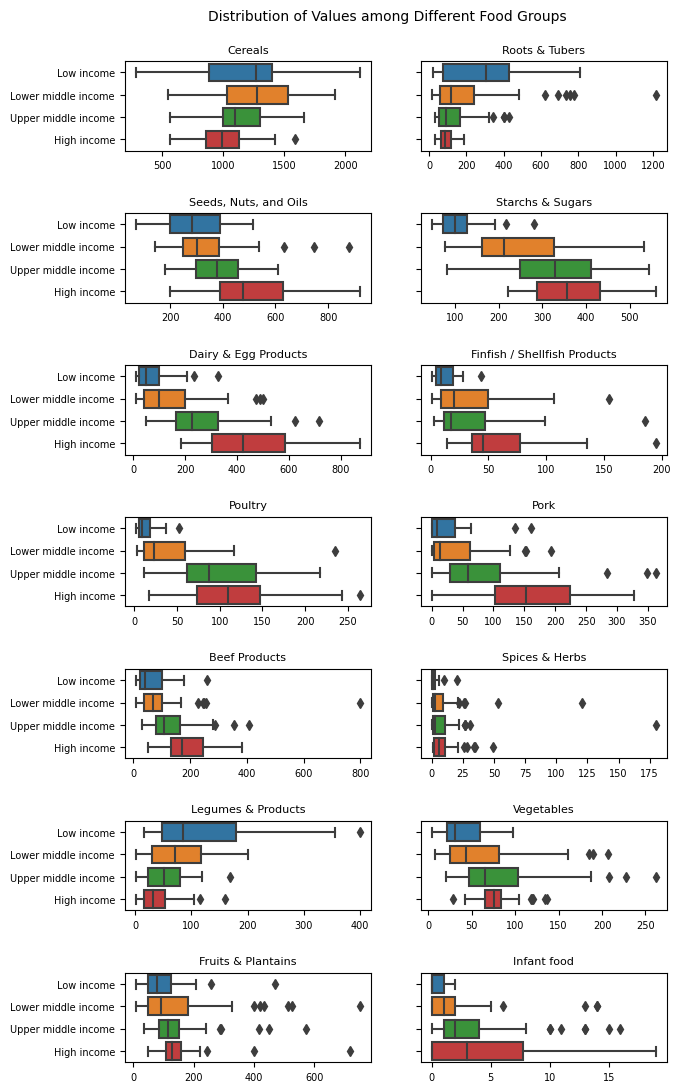

In [4]:
daily_dietary_intake = data

fig, ((ax1, ax2), 
      (ax3, ax4), 
      (ax5, ax6), 
      (ax7, ax8), 
      (ax9, ax10), 
      (ax11, ax12), 
      (ax13, ax14)) = plt.subplots(7, 2, sharey=True, sharex=False, figsize=(7, 13))

def distributions(df, x, y, ax) :
    """Plots Boxplots for income groups"""
    
    g = sns.boxplot(data=df,
                    ax= ax,
                    x=x,
                    palette='tab10',
                    y=y).set(xlabel='',
                             ylabel='',
                             title=x)
    
    ax.set_title(x, fontsize=8)
    
    ax.tick_params(axis='both', which='major', labelsize=7)
    
    return g

distributions(df=daily_dietary_intake, x="Cereals", y="Income group", ax=ax1)
distributions(df=daily_dietary_intake, x="Roots & Tubers", y="Income group", ax=ax2)
distributions(df=daily_dietary_intake, x="Seeds, Nuts, and Oils", y="Income group", ax=ax3)
distributions(df=daily_dietary_intake, x="Starchs & Sugars", y="Income group", ax=ax4)
distributions(df=daily_dietary_intake, x="Dairy & Egg Products", y="Income group", ax=ax5)
distributions(df=daily_dietary_intake, x="Finfish / Shellfish Products", y="Income group", ax=ax6)
distributions(df=daily_dietary_intake, x="Poultry", y="Income group", ax=ax7)
distributions(df=daily_dietary_intake, x="Pork", y="Income group", ax=ax8)
distributions(df=daily_dietary_intake, x="Beef Products", y="Income group", ax=ax9)
distributions(df=daily_dietary_intake, x="Spices & Herbs", y="Income group", ax=ax10)
distributions(df=daily_dietary_intake, x="Legumes & Products", y="Income group", ax=ax11)
distributions(df=daily_dietary_intake, x="Vegetables", y="Income group", ax=ax12)
distributions(df=daily_dietary_intake, x="Fruits & Plantains", y="Income group", ax=ax13)
distributions(df=daily_dietary_intake, x="Infant food", y="Income group", ax=ax14)

plt.suptitle('Distribution of Values among Different Food Groups', y= 0.92, fontsize=10)
plt.subplots_adjust(hspace= 0.7)

There is a rollercoaster of extreme values. I can remove them, but then I will endanger my sample size. I can also transform them, but that'll be too much from what I want from this data. I'll instead take median as the measure of central tendency. That'll do the job.

# Median Daily Intakes of The 11 Foods (In KCal)

In [5]:
# setting the "Country" as the table's index so that I have only 1 categorical column in the data.
daily_dietary_intake = data.set_index("Country")

# grouping values by median
median_kilo_cal_transposed = daily_dietary_intake.groupby("Income group").median().T

median_kilo_cal_transposed

Income group,High income,Low income,Lower middle income,Upper middle income
Cereals,988.0,1266.0,1281.5,1099.0
Roots & Tubers,86.5,307.0,116.5,89.0
"Seeds, Nuts, and Oils",476.0,285.0,301.0,377.0
Starchs & Sugars,357.0,99.0,211.0,329.0
Dairy & Egg Products,421.0,47.0,100.0,225.0
Finfish / Shellfish Products,45.0,9.0,20.0,18.0
Poultry,109.5,9.0,23.5,88.0
Pork,152.0,9.0,13.5,59.0
Beef Products,172.5,41.0,71.0,107.0
Spices & Herbs,6.0,1.0,2.5,3.0


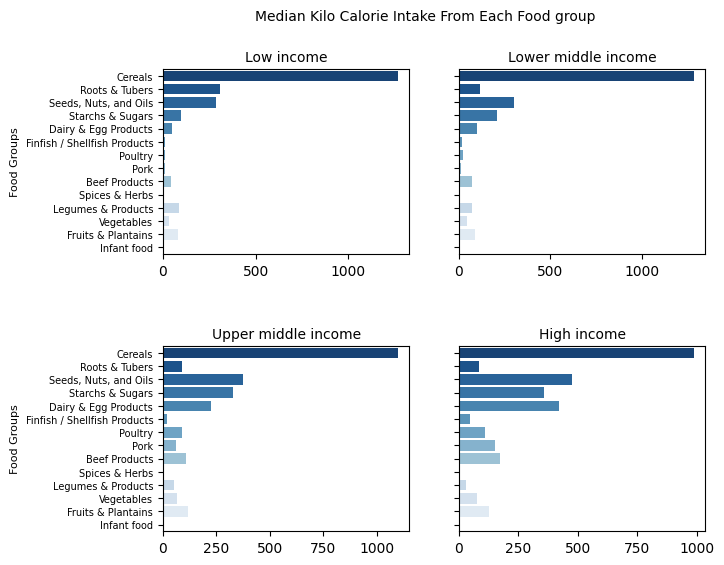

In [6]:
## Visualizing the information above:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=True)
fig.set_size_inches(7, 6)


def bar_plotter(df, x, y, ax, xlabel=None, ylabel=None, palette=None, title=None) :
    
    """Creates bar plots for Income groups"""
    
    g = sns.barplot(x=x,
                    y=y,
                    data= df,
                    ax= ax,
                    palette=palette).set(xlabel='')


    ax.tick_params(axis= 'y', which='major', labelsize=7)
    ax.set_ylabel(ylabel, fontdict={"fontsize" : 8})
    ax.set_xlabel(xlabel, fontdict={'fontsize' : 8})
    ax.set_title(label=x, fontsize=10)
    plt.subplots_adjust(hspace=0.5)



df = median_kilo_cal_transposed

y = median_kilo_cal_transposed.index

yl = 'Food Groups'


bar_plotter(df, x='Low income', y=y, ax=ax1, ylabel=yl, palette="Blues_r")

bar_plotter(df, x='Lower middle income', ax=ax2, y=y, palette="Blues_r")

bar_plotter(df, x='Upper middle income', ax=ax3, y=y, ylabel=yl, palette="Blues_r")

bar_plotter(df, x='High income', y=y, ax=ax4, palette="Blues_r")


plt.suptitle('Median Kilo Calorie Intake From Each Food group', fontsize=10)
plt.savefig('Median Daily_Intake_Kcal.png')
plt.show()

# Percent of KiloCalories from Non-staples

To determine what food counts as a staple and what doesn't, a deep literature review came to the conclusion that staple foods are foods that contribute more than 12.5 percent of median daily energy intake. For further reading on this particular issue, check the results and discussions portion of the thesis [here]().

In [7]:
# Segragating income groups
median_kcal_high_income = median_kilo_cal_transposed[['High income']].sort_values('High income', ascending=False)

median_kcal_low_income = median_kilo_cal_transposed[['Low income']].sort_values('Low income' , ascending=False)

median_kcal_lower_middle_income = median_kilo_cal_transposed[['Lower middle income']].sort_values('Lower middle income', ascending=False)

median_kcal_upper_middle_income = median_kilo_cal_transposed[['Upper middle income']].sort_values('Upper middle income', ascending=False)


# Making a function for calculating the percentage of kcals
def percentage_cal(df) :
    
    """Calculates Percentage For Each Food Group"""

    df.loc['Total'] = df.iloc[:, 0].sum()

    numerator = df.iloc[:, 0].values

    denominator = df.loc['Total'].values

    df['Percent'] = np.round(((numerator / denominator) * 100), 1)
    
    return df



# Calculating the kcals
food_group_kcal_percent_high_income = percentage_cal(median_kcal_high_income)

food_group_kcal_percent_low_income = percentage_cal(median_kcal_low_income)

food_group_kcal_percent_lower_middle = percentage_cal(median_kcal_lower_middle_income)

food_group_kcal_percent_upper_middle = percentage_cal(median_kcal_upper_middle_income)

display(pd.concat([food_group_kcal_percent_low_income.T,
                   food_group_kcal_percent_lower_middle.T,
                   food_group_kcal_percent_upper_middle.T,
                   food_group_kcal_percent_high_income.T]))

,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Starchs & Sugars,Legumes & Products,Fruits & Plantains,Dairy & Egg Products,Beef Products,Vegetables,Finfish / Shellfish Products,Poultry,Pork,Spices & Herbs,Infant food,Total
Income group,,,,,,,,,,,,,,,
Low income,1266.0,307.0,285.0,99.0,85.0,80.0,47.0,41.0,31.0,9.0,9.0,9.0,1.0,0.0,2269.0
Percent,55.8,13.5,12.6,4.4,3.7,3.5,2.1,1.8,1.4,0.4,0.4,0.4,0.0,0.0,100.0
Lower middle income,1281.5,116.5,301.0,211.0,71.0,91.0,100.0,71.0,43.0,20.0,23.5,13.5,2.5,1.0,2346.5
Percent,54.6,5.0,12.8,9.0,3.0,3.9,4.3,3.0,1.8,0.9,1.0,0.6,0.1,0.0,100.0
Upper middle income,1099.0,89.0,377.0,329.0,51.0,116.0,225.0,107.0,65.0,18.0,88.0,59.0,3.0,2.0,2628.0
Percent,41.8,3.4,14.3,12.5,1.9,4.4,8.6,4.1,2.5,0.7,3.3,2.2,0.1,0.1,100.0
High income,988.0,86.5,476.0,357.0,32.0,127.5,421.0,172.5,76.0,45.0,109.5,152.0,6.0,3.0,3052.0
Percent,32.4,2.8,15.6,11.7,1.0,4.2,13.8,5.7,2.5,1.5,3.6,5.0,0.2,0.1,100.0


In [10]:
# 11. Extracting median daily calory intake from staple & non-staple food from each income group
daily_calories_non_staples_low_income = food_group_kcal_percent_low_income[food_group_kcal_percent_low_income['Percent'] < 12.5]

staples_low_income = food_group_kcal_percent_low_income[food_group_kcal_percent_low_income['Percent'] >= 12.5]


daily_calories_non_staples_high_income = food_group_kcal_percent_high_income[food_group_kcal_percent_high_income['Percent'] < 12.5]

staples_high_income = food_group_kcal_percent_high_income[food_group_kcal_percent_high_income['Percent'] >= 12.5]


daily_calories_non_staples_lower_middle = food_group_kcal_percent_lower_middle[food_group_kcal_percent_lower_middle['Percent'] < 12.5]

staples_lower_middle = food_group_kcal_percent_lower_middle[food_group_kcal_percent_lower_middle['Percent'] >= 12.5]


daily_calories_non_staples_upper_middle = food_group_kcal_percent_upper_middle[food_group_kcal_percent_upper_middle['Percent'] < 12.5]

staples_upper_middle = food_group_kcal_percent_upper_middle[food_group_kcal_percent_upper_middle['Percent'] >= 12.5]


non_staples = pd.concat([daily_calories_non_staples_low_income.T.rename(index={"Percent" : "low_inc_percent"}).drop("Low income"),
                         daily_calories_non_staples_lower_middle.T.rename(index={"Percent" : "lower_mid_percent"}).drop("Lower middle income"),
                         daily_calories_non_staples_upper_middle.T.rename(index={"Percent" : "upper_mid_percent"}).drop("Upper middle income"),
                         daily_calories_non_staples_high_income.T.rename(index={"Percent" : "high_inc_percent"}).drop("High income")])

non_staples

,Starchs & Sugars,Legumes & Products,Fruits & Plantains,Dairy & Egg Products,Beef Products,Vegetables,Finfish / Shellfish Products,Poultry,Pork,Spices & Herbs,Infant food,Roots & Tubers
Income group,,,,,,,,,,,,
low_inc_percent,4.4,3.7,3.5,2.1,1.8,1.4,0.4,0.4,0.4,0.0,0.0,NaN
lower_mid_percent,9.0,3.0,3.9,4.3,3.0,1.8,0.9,1.0,0.6,0.1,0.0,5.0
upper_mid_percent,NaN,1.9,4.4,8.6,4.1,2.5,0.7,3.3,2.2,0.1,0.1,3.4
high_inc_percent,11.7,1.0,4.2,NaN,5.7,2.5,1.5,3.6,5.0,0.2,0.1,2.8


In [11]:
# Creating a column that sums up percentages from each income group
non_staples = non_staples.T # I transposed the dataset so that I can calculate the sums of each income group's percentage

non_staples.loc["Total Percentage"] = non_staples.sum()

non_staples = non_staples.T.sort_values("Total Percentage", ascending=False)

non_staples

,Starchs & Sugars,Legumes & Products,Fruits & Plantains,Dairy & Egg Products,Beef Products,Vegetables,Finfish / Shellfish Products,Poultry,Pork,Spices & Herbs,Infant food,Roots & Tubers,Total Percentage
Income group,,,,,,,,,,,,,
high_inc_percent,11.7,1.0,4.2,NaN,5.7,2.5,1.5,3.6,5.0,0.2,0.1,2.8,38.3
lower_mid_percent,9.0,3.0,3.9,4.3,3.0,1.8,0.9,1.0,0.6,0.1,0.0,5.0,32.6
upper_mid_percent,NaN,1.9,4.4,8.6,4.1,2.5,0.7,3.3,2.2,0.1,0.1,3.4,31.3
low_inc_percent,4.4,3.7,3.5,2.1,1.8,1.4,0.4,0.4,0.4,0.0,0.0,NaN,18.1


Text(0.5, 1.0, 'Percent of KCal From Non-Staple Foods')

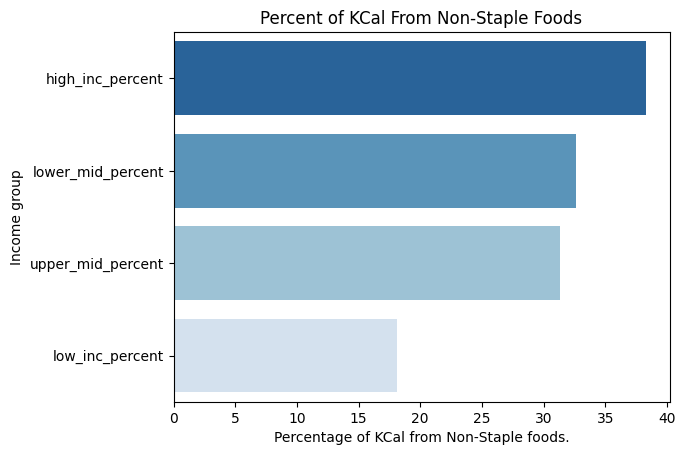

In [12]:
# Visualizing that information
fig, ax = plt.subplots()

sns.barplot(data=non_staples,
            x="Total Percentage",
            y=non_staples.index,
            palette="Blues_r").set(xlabel="Percentage of KCal from Non-Staple foods.")

ax.set_title("Percent of KCal From Non-Staple Foods")

# Conclusion

As we can see from the results, high-income countries performed better, followed by lower-middle-income countries, then upper-middle-income countries, and then low-income countries. The arrangement of country groups above suggests a non-linear relationship between the size of economy and this indicator.